In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import scipy as sp
from sklearn import preprocessing
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from skimage.filters import sobel

%matplotlib inline


NUM_FRAME = 226
IM_LENGTH = 640
IM_HEIGHT = 480

In [2]:
shaky_cam1_mat = np.asarray(sio.loadmat('cam1_2')['vidFrames1_2'])
shaky_cam2_mat = np.asarray(sio.loadmat('cam2_2')['vidFrames2_2'])
shaky_cam3_mat = np.asarray(sio.loadmat('cam3_2')['vidFrames3_2'])

## A: Animation

In [3]:
    # %%time
    # # First set up the figure
    # fig4 = plt.figure()

    # im_shaky_cam1=plt.imshow(shaky_cam1_mat[:,:,:,0])

    # # animation function.  This is called sequentially
    # def animate_shaky_cam1(i):
    #     curr_frame = im_shaky_cam1.set_data(shaky_cam1_mat[:,:,:,i])
    #     return curr_frame

    # # call the animator.  blit=True means only re-draw the parts that have changed.
    # anim_shaky_cam1 = animation.FuncAnimation(fig4, animate_shaky_cam1, frames=NUM_FRAME, interval=20)

    # anim_shaky_cam1.save('shaky_cam1.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [4]:
# HTML(anim_shaky_cam1.to_html5_video())

## B: Boxing

### B1: Cam1+Cam2+Cam3

In [5]:
# shaky_data_matrix = np.zeros((IM_LENGTH*IM_HEIGHT,NUM_FRAME))
shaky_data_matrix1 = [] 

col_curr = np.zeros((IM_LENGTH*IM_HEIGHT,1))
for i in range (0,NUM_FRAME):
    col_curr = np.vstack((shaky_cam1_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 
                          shaky_cam2_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 
                          shaky_cam3_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1)))
    shaky_data_matrix1.append(col_curr)

shaky_data_matrix1 = np.asarray(shaky_data_matrix1).squeeze()

print(shaky_data_matrix1.shape)
print(min(shaky_data_matrix1.shape))

(226, 921600)
226


In [6]:
%%time 
shaky_data_matrix1_scaled = preprocessing.scale(shaky_data_matrix1) 

U_p21,Lamda_p21,V_s_p21 = sp.sparse.linalg.svds(shaky_data_matrix1_scaled,k=100)

C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Wall time: 58.8 s


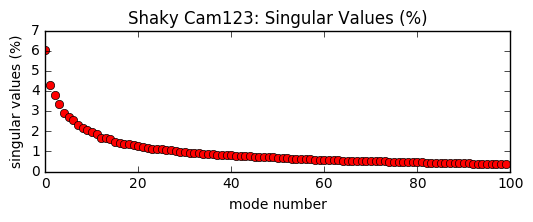

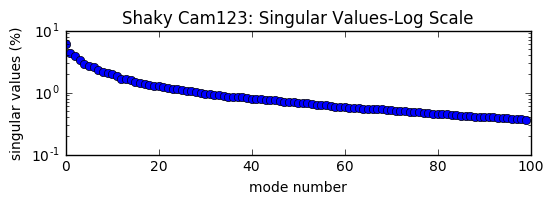

In [7]:
## Plot:
Lamda_p21_sorted = -np.sort(-Lamda_p21)
sigmas_percent21 = Lamda_p21_sorted /sum(Lamda_p21_sorted)*100

plt.figure(1)
plt.subplot(2,1,1)
plt.plot((Lamda_p21_sorted/sum(Lamda_p21_sorted)*100),'ro')
plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Shaky Cam123: Singular Values (%)")

plt.figure(2)
plt.subplot(2,1,2)
plt.semilogy(Lamda_p21_sorted/sum(Lamda_p21_sorted)*100,'bo')
plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Shaky Cam123: Singular Values-Log Scale")

plt.subplots_adjust(hspace=0.5)

### B2) Cam1 Only

In [8]:
%%time
shaky_cam1_matrix2 = [] 

col_curr = np.zeros((IM_LENGTH*IM_HEIGHT,1))
for i in range (0,NUM_FRAME):
    col_curr = shaky_cam1_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 

    shaky_cam1_matrix2.append(col_curr)

shaky_cam1_matrix2 = np.transpose(np.asarray(shaky_cam1_matrix2).squeeze())

shaky_cam1_matrix2_scaled = preprocessing.scale(shaky_cam1_matrix2) 

U_cam1_p22,Lamda_cam1_p22,V_s_cam1_p22 = sp.sparse.linalg.svds(shaky_cam1_matrix2_scaled,k=100)

print(shaky_cam1_matrix2.shape) 

C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(307200, 226)
Wall time: 17.4 s


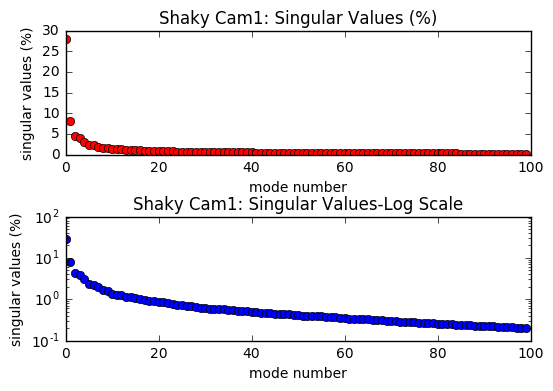

In [9]:
## Plot:
Lamda_cam1_p22_sorted = -np.sort(-Lamda_cam1_p22)
Lamda_cam1_p22_sorted_normed = preprocessing.scale(Lamda_cam1_p22_sorted) 

plt.figure(1)
plt.subplot(2,1,1)
plt.plot((Lamda_cam1_p22_sorted/sum(Lamda_cam1_p22_sorted)*100),'ro')

plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Shaky Cam1: Singular Values (%)")


plt.subplot(2,1,2)
plt.semilogy(Lamda_cam1_p22_sorted/sum(Lamda_cam1_p22_sorted)*100,'bo')
plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Shaky Cam1: Singular Values-Log Scale")
plt.subplots_adjust(hspace=0.5)

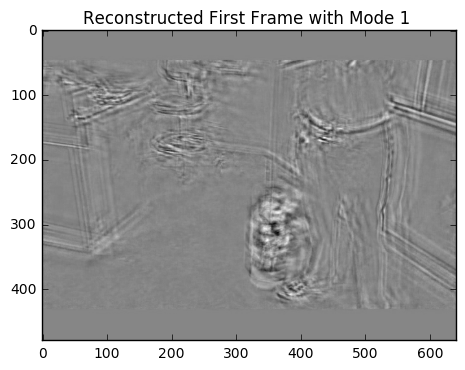

In [10]:
re_cam1_d1 = U_cam1_p22[:,0].reshape(IM_HEIGHT,IM_LENGTH)
re_cam1_d2 = U_cam1_p22[:,1].reshape(IM_HEIGHT,IM_LENGTH)
re_cam1_d3 = U_cam1_p22[:,2].reshape(IM_HEIGHT,IM_LENGTH)

plt.imshow(re_cam1_d1, 'gray')
plt.title("Reconstructed First Frame with Mode 1 ")



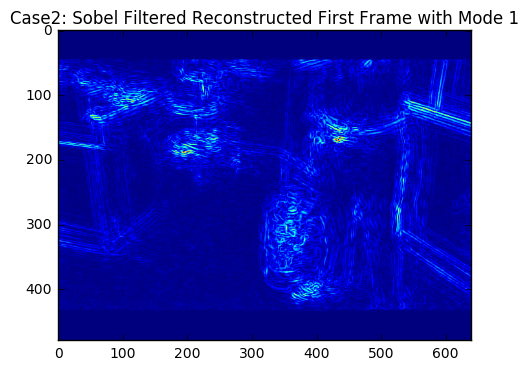

In [11]:
elevation_map = sobel(re_cam1_d1)
plt.imshow(elevation_map)
plt.title("Case2: Sobel Filtered Reconstructed First Frame with Mode 1")